# Exploratory Data Analysis (EDA) for Substitution Models

This notebook analyzes the `sub_normalized.csv` dataset, which is used by the `SubstitutionRecommender` model. The goal is to analyze common substitutions and visualize the substitution network.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud

In [11]:
# Load the dataset
csv_path = os.path.join('..', 'substitution_models', 'sub_normalized.csv')
df = pd.read_csv(csv_path)

print('Dataset loaded successfully.')

Dataset loaded successfully.


## 1. Data Overview

Let's start by examining the first few rows of the dataset and getting a summary of its contents.

In [12]:
print('First 5 rows of the dataset:')
display(df.head())

print('\nDataset Info:')
df.info()

First 5 rows of the dataset:


,ingredient,substitute,normalized_ingredient,normalized_substitute
0,carrots,sweet potatoes,carrot,sweet potato
1,carrots,turnips,carrot,turnip
2,carrots,rutabaga,carrot,rutabaga
3,carrots,radishes,carrot,radish
4,olive oil,avocado oil,olive oil,oil



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745546 entries, 0 to 1745545
Data columns (total 4 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   ingredient             object
 1   substitute             object
 2   normalized_ingredient  object
 3   normalized_substitute  object
dtypes: object(4)
memory usage: 53.3+ MB


## 2. Common Substitutions

Let's identify the most common ingredients and their substitutes.

C:\Users\mandu\AppData\Local\Temp\ipykernel_5008\1699022256.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ingredients.values, y=top_ingredients.index, palette='cubehelix')


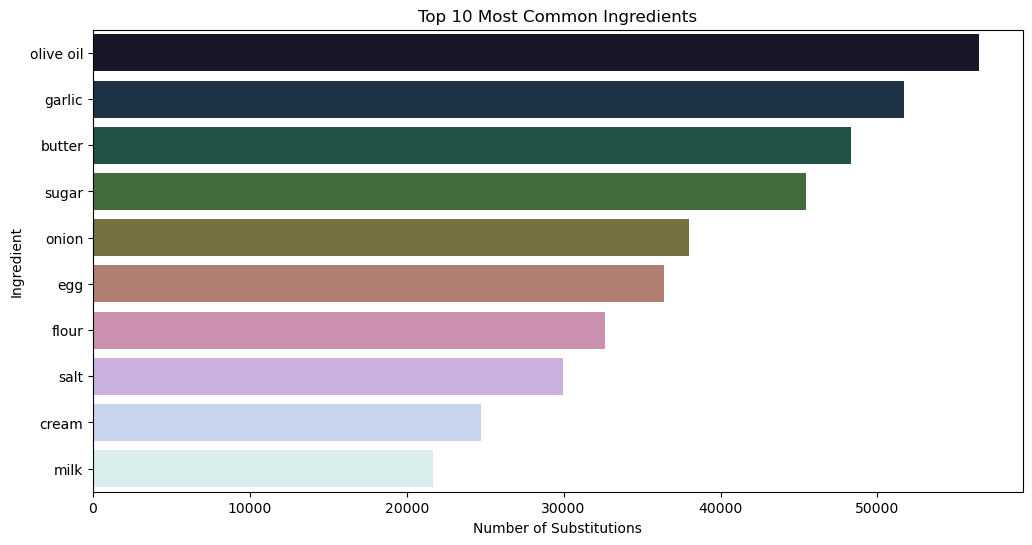

C:\Users\mandu\AppData\Local\Temp\ipykernel_5008\1699022256.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_substitutes.values, y=top_substitutes.index, palette='rocket')


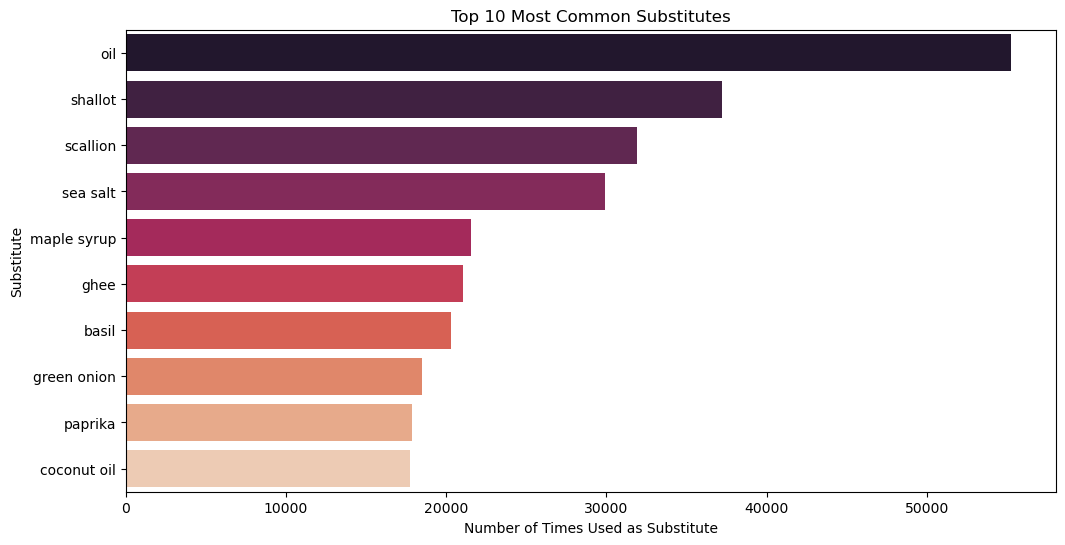

In [13]:
top_ingredients = df['normalized_ingredient'].value_counts().nlargest(10)
top_substitutes = df['normalized_substitute'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_ingredients.values, y=top_ingredients.index, palette='cubehelix')
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Number of Substitutions')
plt.ylabel('Ingredient')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=top_substitutes.values, y=top_substitutes.index, palette='rocket')
plt.title('Top 10 Most Common Substitutes')
plt.xlabel('Number of Times Used as Substitute')
plt.ylabel('Substitute')
plt.show()

## 3. Substitution Word Cloud

Given the large number of substitutions (around 1.7 million), a network graph would be too dense to read. A word cloud is a better way to visualize the most frequent ingredients and substitutes.

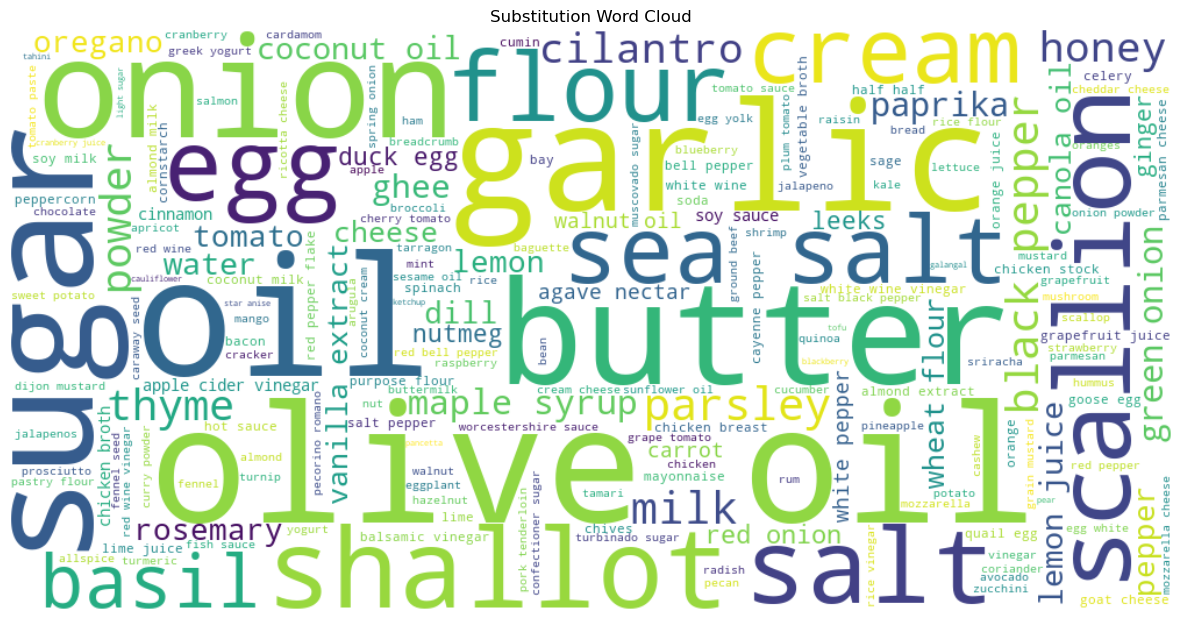

In [14]:
# Combine ingredients and substitutes and calculate their frequencies
all_substitutions = pd.concat([df['normalized_ingredient'], df['normalized_substitute']]).dropna()
word_frequencies = all_substitutions.value_counts().to_dict()

# Generate the word cloud from frequencies
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Substitution Word Cloud')
plt.show()